# **Importing Libraries**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing The Dataset**

In [10]:
dataset= pd.read_csv('../input/diabetes/diabetes.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

# **Exploratory Data Analysis**

In [11]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [13]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [14]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


# PLOTS for Visualization and Insights

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7fc1c83d0>,
      dtype=object)

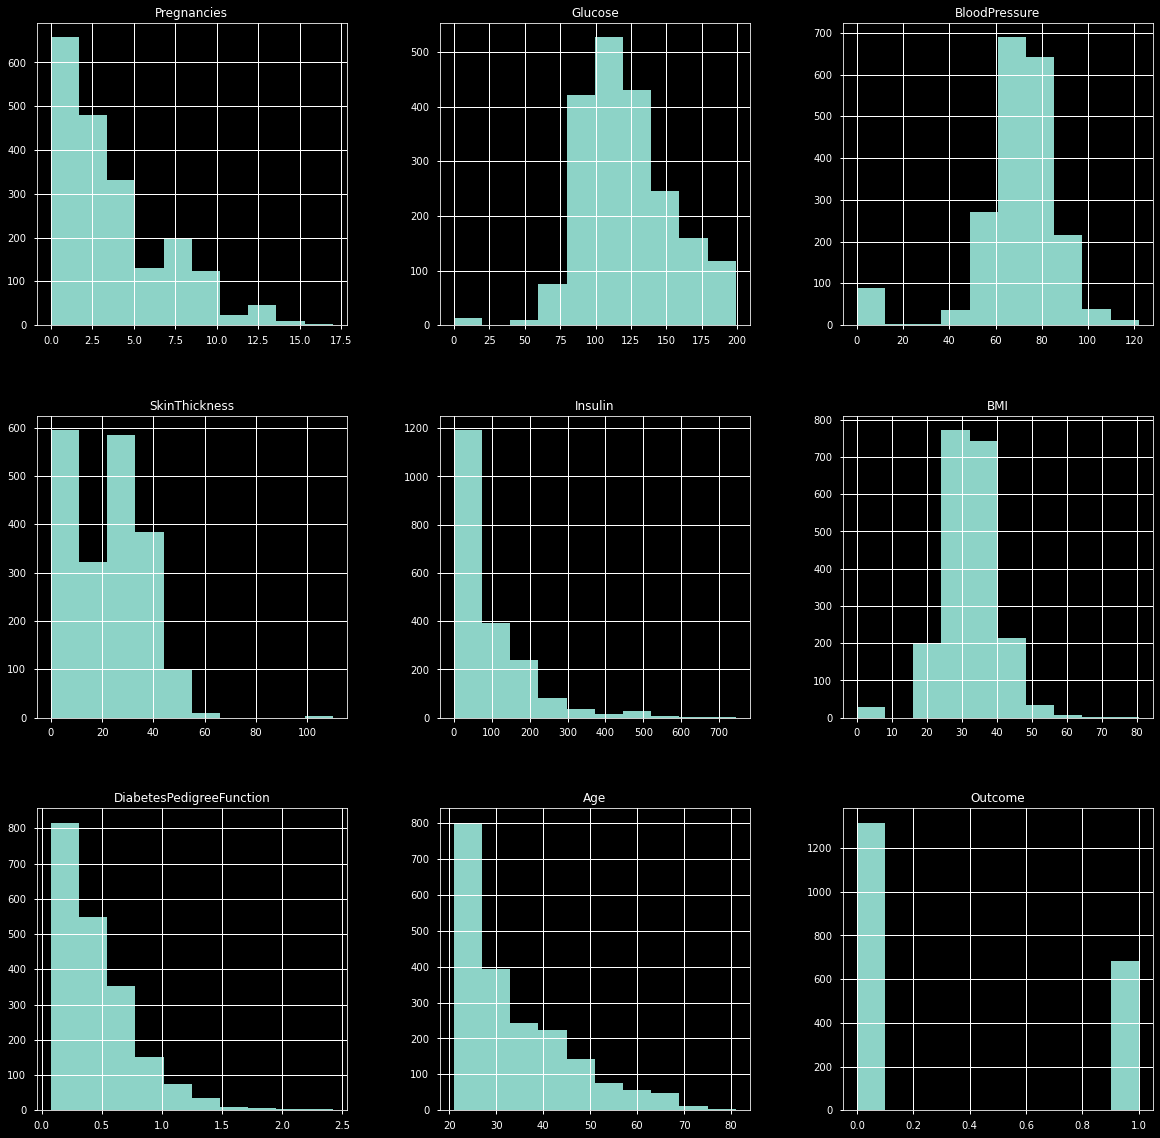

In [34]:
dataset.hist(figsize = (20,20))

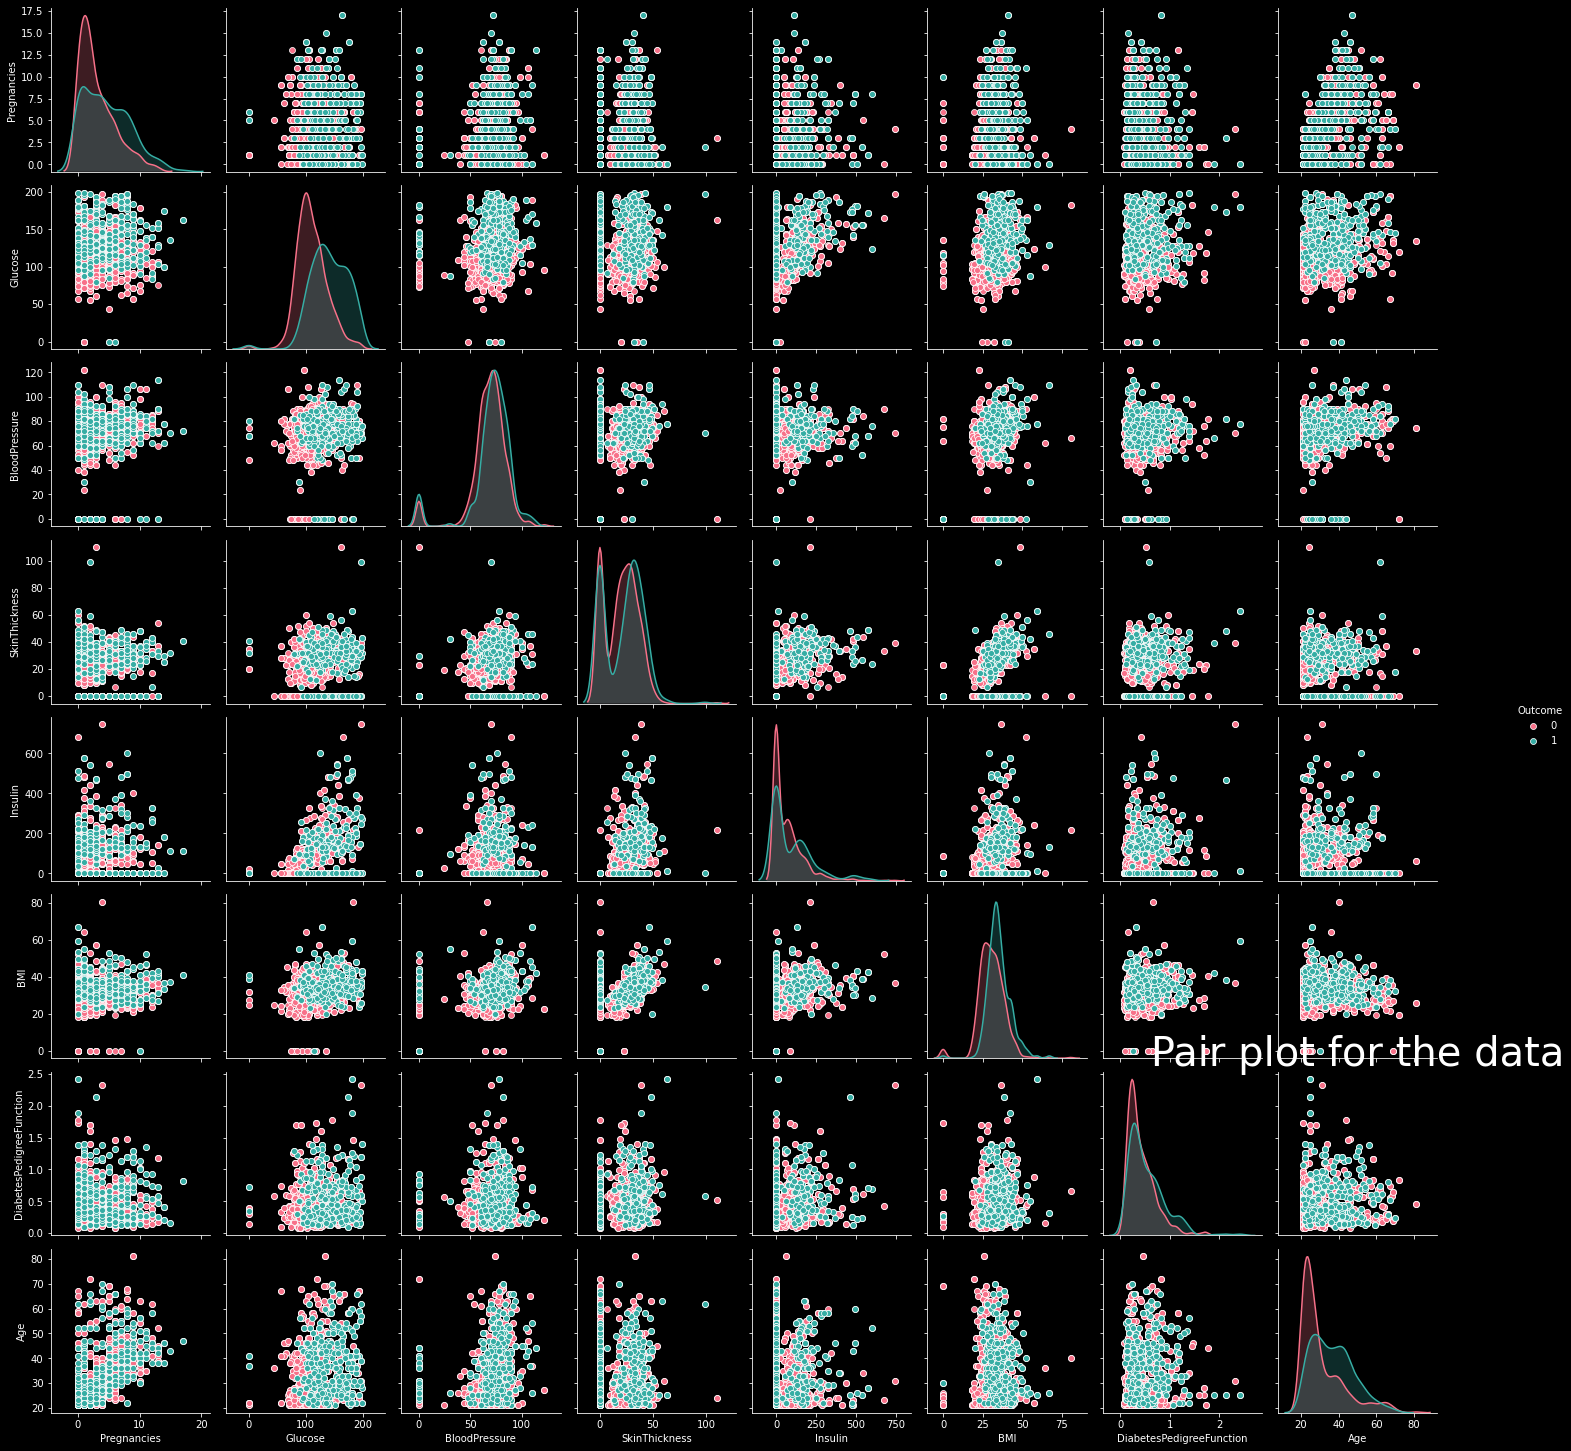

In [16]:
# 0 - pink color scatter indicates No Diabetes
# 1 - blue color scatter indicates Has Diabetes
plt.rcParams['figure.figsize'] = (40, 41)
plt.style.use('dark_background')

sns.pairplot(dataset, hue = 'Outcome', palette = 'husl')
plt.title('Pair plot for the data', fontsize = 40)
plt.show()

# **It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values**


In [17]:
dataset_copy = dataset.copy(deep = True)
dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(dataset_copy.isnull().sum())

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


# Aiming to impute nan values for the columns in accordance with their distribution

In [18]:
dataset_copy['Glucose'].fillna(dataset_copy['Glucose'].mean(), inplace = True)
dataset_copy['BloodPressure'].fillna(dataset_copy['BloodPressure'].mean(), inplace = True)
dataset_copy['SkinThickness'].fillna(dataset_copy['SkinThickness'].median(), inplace = True)
dataset_copy['Insulin'].fillna(dataset_copy['Insulin'].median(), inplace = True)
dataset_copy['BMI'].fillna(dataset_copy['BMI'].median(), inplace = True)

# **Plotting after Nan removal**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff807f11490>,
      dtype=object)

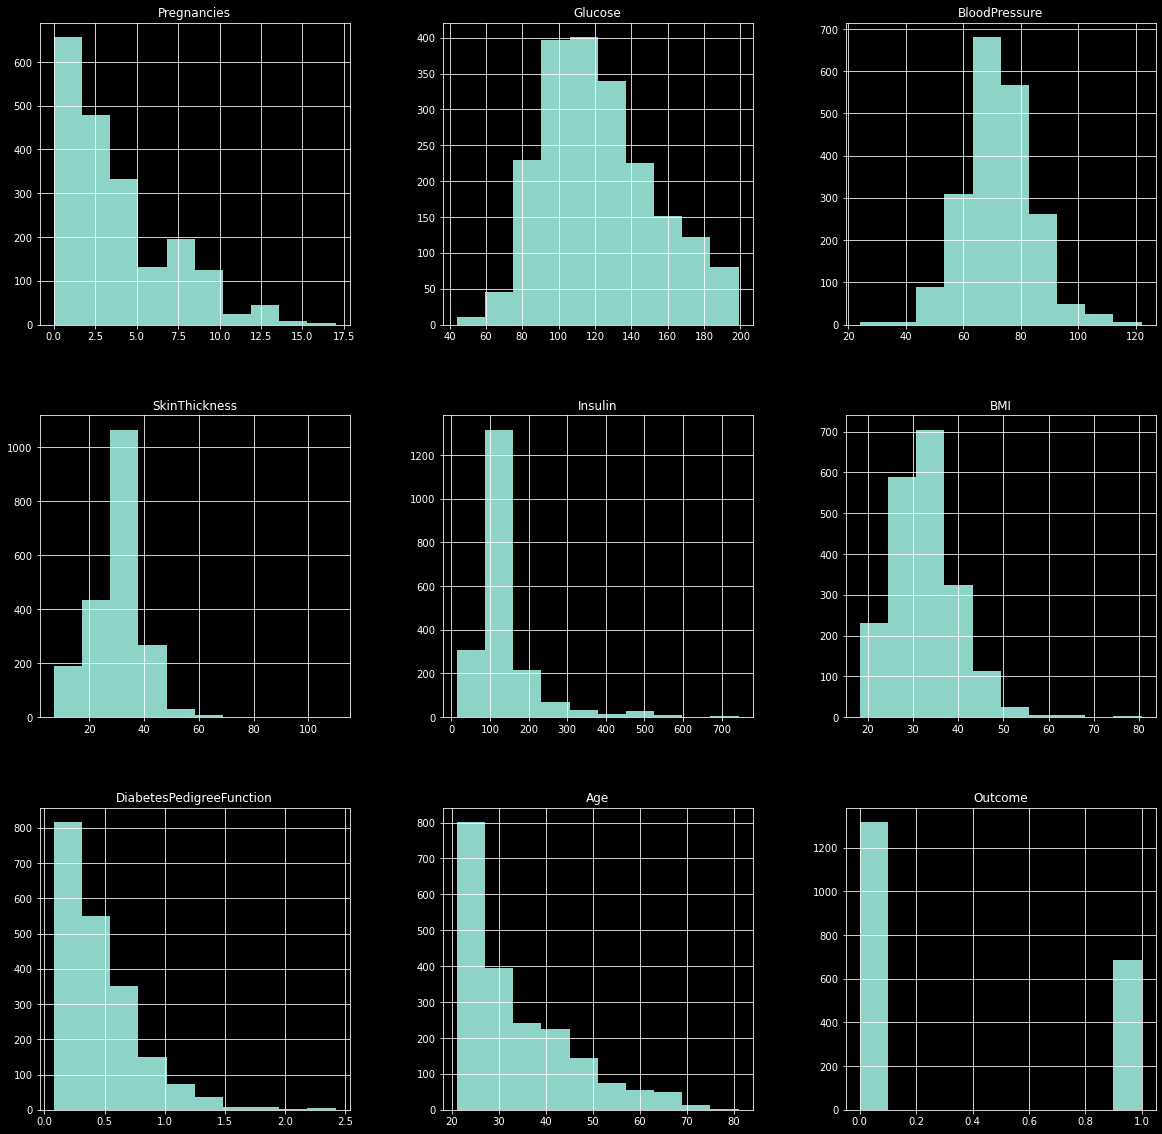

In [19]:
dataset_copy.hist(figsize = (20,20))

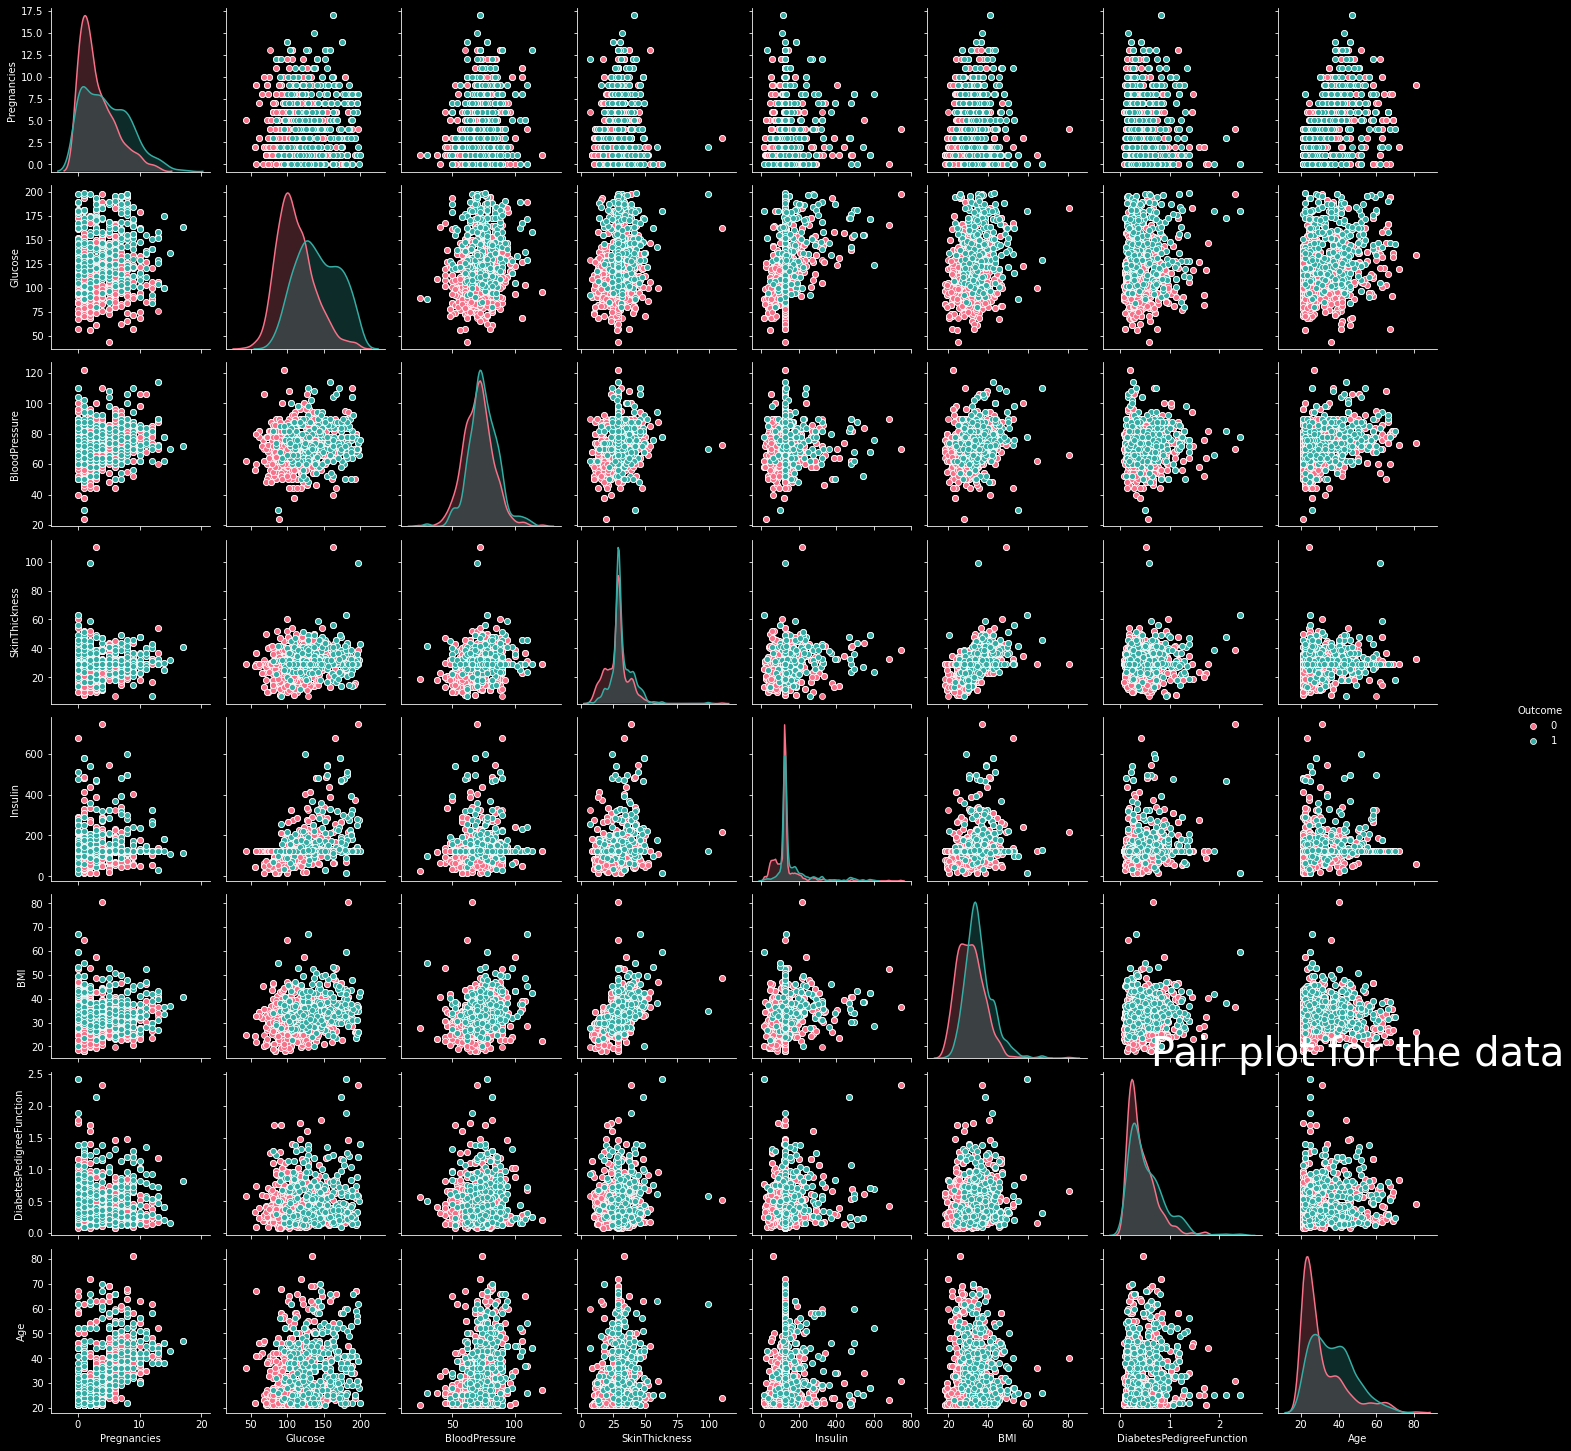

In [20]:
# 0 - pink color scatter indicates No Diabetes
# 1 - blue color scatter indicates Has Diabetes
plt.rcParams['figure.figsize'] = (40, 41)
plt.style.use('dark_background')

sns.pairplot(dataset_copy, hue = 'Outcome', palette = 'husl')
plt.title('Pair plot for the data', fontsize = 40)
plt.show()

# Heatmap for unclean data

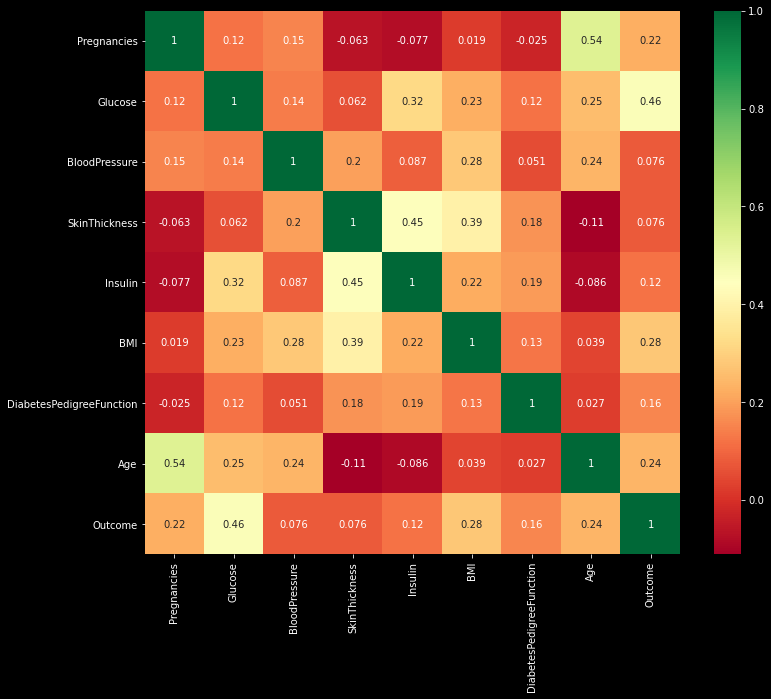

In [21]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(dataset.corr(), annot=True,cmap ='RdYlGn') 

# Heatmap for clean data

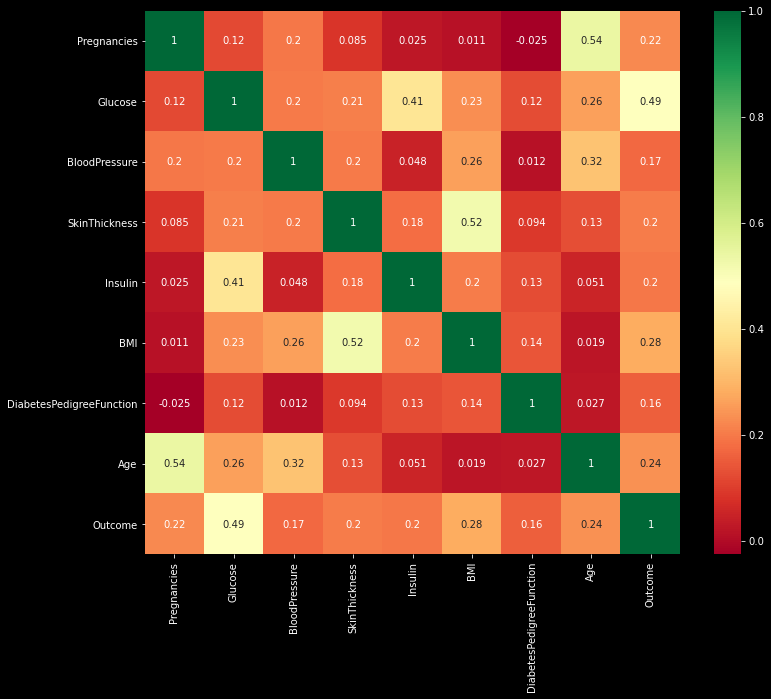

In [22]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(dataset_copy.corr(), annot=True,cmap ='RdYlGn') 

# **Feature Scaling**

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(dataset_copy.drop(["Outcome"],axis = 1))

# **Splitting Data**

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

# **Train The Model**

# Logistic Regression

train_score classifier 0.7629407351837959
test_score classifier 0.7931034482758621
[[388  51]
 [ 87 141]]


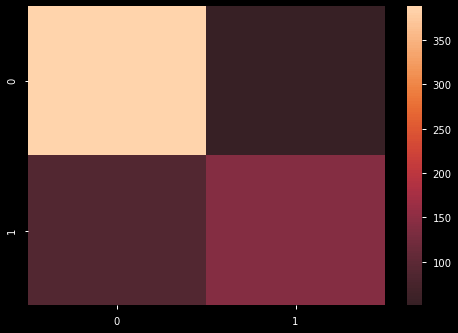

In [35]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0,C=1.0,max_iter=200)
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#calculate the details Logistic Regression
print('train_score classifier',classifier.score(X_train,y_train))
print('test_score classifier',classifier.score(X_test,y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show(10,10)


# SVM

train_score svcmodel 0.8439609902475619
test_score svcmodel 0.8350824587706147
[[406  33]
 [ 77 151]]


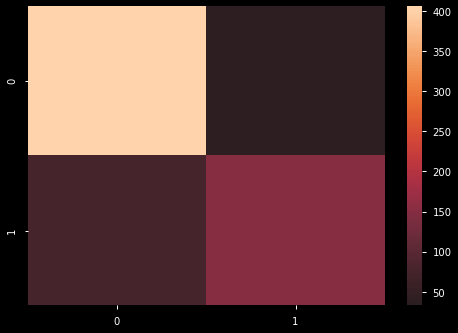

In [36]:
from sklearn.svm import SVC
svcmodel = SVC(kernel='rbf',degree=3)
svcmodel.fit(X_train,y_train)

# Predicting the Test set results SVM
y_pred = svcmodel.predict(X_test)

#calculate the details SVM
print('train_score svcmodel', svcmodel.score(X_train,y_train))
print('test_score svcmodel',svcmodel.score(X_test,y_test))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show(10,10)


# NN

train_score mlp_model 0.8582145536384096
test_score mlp_model 0.8395802098950524
[[393  46]
 [ 61 167]]


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


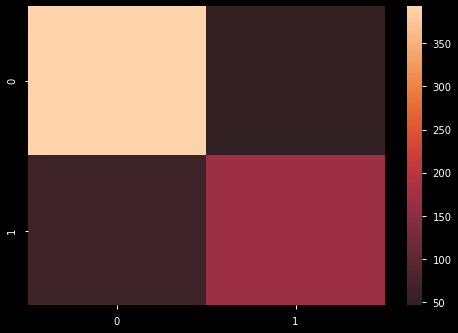

In [37]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=100 ,activation='relu',alpha=0.01,epsilon=1E-08)
mlp_model.fit(X_train,y_train)

# Predicting the Test set results NNClassifier Model
y_pred = mlp_model.predict(X_test)

#calculate the details NNClassifier Model
print('train_score mlp_model', mlp_model.score(X_train,y_train))
print('test_score mlp_model',mlp_model.score(X_test,y_test))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show(10,10)

# KNN

train_score Knnclassifier_model 0.8237059264816204
test_score Knnclassifier_model 0.7961019490254873
[[376  63]
 [ 73 155]]


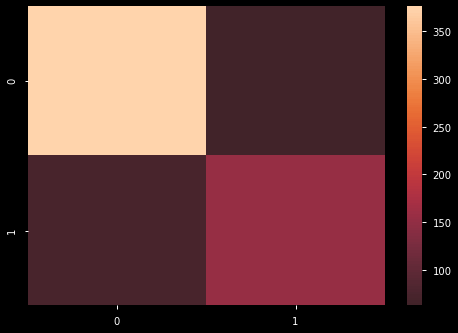

In [38]:
from sklearn.neighbors import KNeighborsClassifier
Knnclassifier_model = KNeighborsClassifier(n_neighbors=11)
Knnclassifier_model.fit(X_train,y_train)

# Predicting the Test set results KNeighborsClassifier
y_pred = Knnclassifier_model.predict(X_test)

#calculate the details KNeighborsClassifier
print('train_score Knnclassifier_model', Knnclassifier_model.score(X_train,y_train))
print('test_score Knnclassifier_model',Knnclassifier_model.score(X_test,y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show(10,10)

# Decision Tree Classification 

train_score DT_model 1.0
test_score DT_model 0.9580209895052474
[[425  14]
 [ 14 214]]


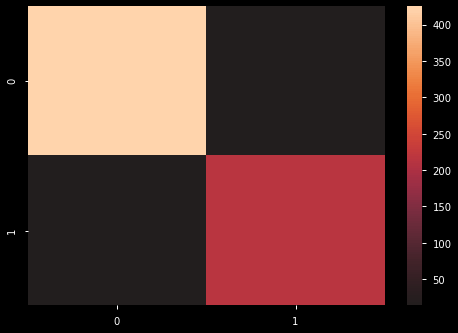

In [39]:
from sklearn.tree import DecisionTreeClassifier
DT_model=DecisionTreeClassifier(criterion='entropy')
DT_model.fit(X_train,y_train)

# Predicting the Test set results DecisionTreeClassifier Model
y_pred = DT_model.predict(X_test)

#calculate the details DecisionTreeClassifier Model
print('train_score DT_model', DT_model.score(X_train,y_train))
print('test_score DT_model',DT_model.score(X_test,y_test))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show(10,10)

# Naive Bayes

train_score gussian_model 0.7426856714178545
test_score gussian_model 0.7796101949025487
[[376  63]
 [ 84 144]]


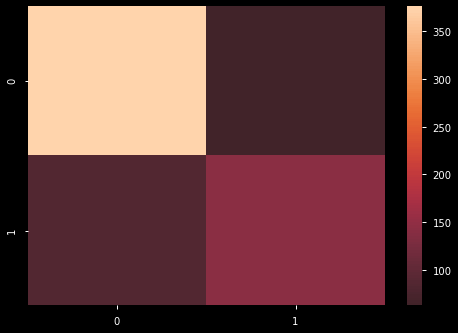

In [40]:
from sklearn.naive_bayes import GaussianNB
gussian_model = GaussianNB(priors=None, var_smoothing=1e-09)
gussian_model.fit(X_train,y_train)

# Predicting the Test set results Naive Bayes
y_pred = gussian_model.predict(X_test)

#calculate the details Naive Bayes
print('train_score gussian_model', gussian_model.score(X_train,y_train))
print('test_score gussian_model',gussian_model.score(X_test,y_test))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show(10,10)

# Random Forest

train_score rfc 0.800450112528132
test_score rfc 0.7901049475262368
[[403  36]
 [104 124]]


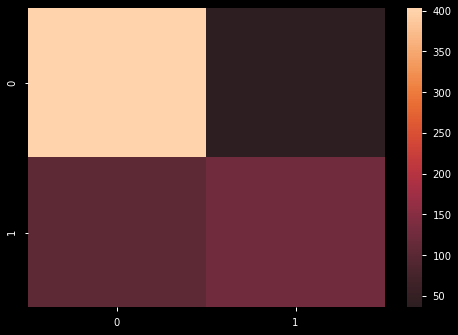

In [41]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(criterion='gini',n_estimators=200,max_depth=3)
rfc.fit(X_train,y_train)

# Predicting the Test set results RandomForestClassifier Model
y_pred = rfc.predict(X_test)

#calculate the details RandomForestClassifier Model
print('train_score rfc', rfc.score(X_train,y_train))
print('test_score rfc',rfc.score(X_test,y_test))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show(10,10)

# **bar chart with labels For Models**

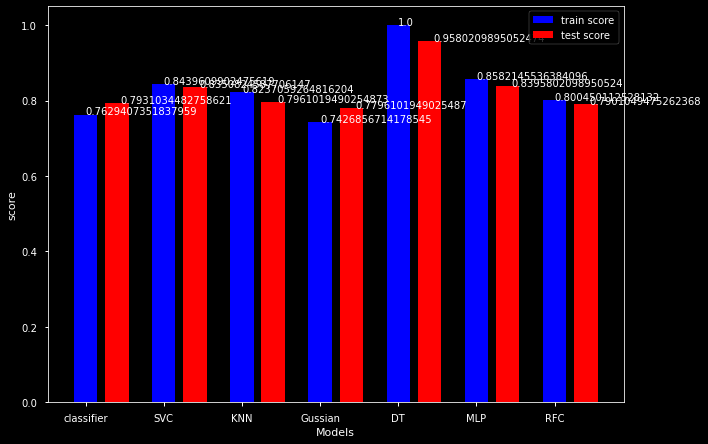

In [42]:
r=[[classifier.score(X_train,y_train),svcmodel.score(X_train,y_train),Knnclassifier_model.score(X_train,y_train),gussian_model.score(X_train,y_train)
   ,DT_model.score(X_train,y_train),mlp_model.score(X_train,y_train),rfc.score(X_train,y_train)],
   [classifier.score(X_test,y_test),svcmodel.score(X_test,y_test),Knnclassifier_model.score(X_test,y_test),gussian_model.score(X_test,y_test)
    ,DT_model.score(X_test,y_test),mlp_model.score(X_test,y_test),rfc.score(X_test,y_test)]]


X = np.arange(7)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.style.use('seaborn-notebook')
ax.bar(X+ 0.00,r[0], color = 'blue', width = 0.30,label = 'train score')
ax.bar(X+ 0.40, r[1], color = 'red', width = 0.30,label = 'test score')
for i,m in list(zip(X,r[0])):
  plt.text(x = i ,y = m,s = m)
for i,m in list(zip(X,r[1])):
  plt.text(x = i + 0.45 ,y = m,s = m)
ax.set_xlabel('Models')
ax.set_ylabel('score')
ax.set_xticklabels(('','classifier', 'SVC', 'KNN', 'Gussian', 'DT','MLP','RFC'))
plt.legend()
plt.show(10,10)